In [2]:
import os
import numpy as np
import tensorflow as tf


In [3]:
IMAGE_DIR = "Images"
ANNOTATION_DIR = "Annotation"

bleeds = os.listdir(ANNOTATION_DIR)

In [4]:
image_set = {}
annotation_set = {}

In [130]:
for bleed in bleeds:
    image_dir = os.path.join(IMAGE_DIR, bleed)
    annotation_dir = os.path.join(ANNOTATION_DIR, bleed)
    image_set[bleed] = os.listdir(image_dir)
    annotation_set[bleed] = os.listdir(annotation_dir)

In [131]:
image_set

{'n02085620-Chihuahua': ['n02085620_10074.jpg',
  'n02085620_10131.jpg',
  'n02085620_10621.jpg',
  'n02085620_1073.jpg',
  'n02085620_10976.jpg',
  'n02085620_11140.jpg',
  'n02085620_11238.jpg',
  'n02085620_11258.jpg',
  'n02085620_11337.jpg',
  'n02085620_11477.jpg',
  'n02085620_1152.jpg',
  'n02085620_11696.jpg',
  'n02085620_11818.jpg',
  'n02085620_11948.jpg',
  'n02085620_1205.jpg',
  'n02085620_12101.jpg',
  'n02085620_12334.jpg',
  'n02085620_1235.jpg',
  'n02085620_1271.jpg',
  'n02085620_12718.jpg',
  'n02085620_1298.jpg',
  'n02085620_13151.jpg',
  'n02085620_1321.jpg',
  'n02085620_13383.jpg',
  'n02085620_1346.jpg',
  'n02085620_13964.jpg',
  'n02085620_14252.jpg',
  'n02085620_14413.jpg',
  'n02085620_14516.jpg',
  'n02085620_1455.jpg',
  'n02085620_1492.jpg',
  'n02085620_1502.jpg',
  'n02085620_1558.jpg',
  'n02085620_1569.jpg',
  'n02085620_1617.jpg',
  'n02085620_1620.jpg',
  'n02085620_1765.jpg',
  'n02085620_1816.jpg',
  'n02085620_1862.jpg',
  'n02085620_1916.jp

In [132]:
test_image= os.path.join("Images","n02085620-Chihuahua","n02085620_10621.jpg")
test_label_info = os.path.join(ANNOTATION_DIR,"n02085620-Chihuahua","n02085620_10621")
os.path.exists(test_label_info)


True

In [135]:
with open(test_label_info, "r") as f:
    contents = f.read()

from bs4 import BeautifulSoup
soup = BeautifulSoup(contents, 'lxml')
size_info = []
size_info.append(int(soup.find("width").text))
size_info.append(int(soup.find("height").text))


bndboxes = soup.find_all("bndbox")
coordinates = []
for box in bndboxes:
    temp = []
    temp.append(int(box.find("xmin").text))
    temp.append(int(box.find("ymin").text))
    temp.append(int(box.find("xmax").text))
    temp.append(int(box.find("ymax").text))
    coordinates.append(temp)  

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [137]:
def PIL2array(img):
    return np.array(img.getdata(),
                    np.uint8).reshape(img.size[1], img.size[0], 3)

(207, 193, 3)


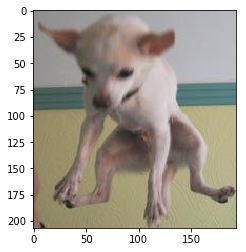

In [138]:
from PIL import Image

# Load the original image:
img = Image.open(test_image)
img.show()
for box in coordinates:
    img = img.resize( (size_info[0],size_info[1]))
    
    img2 = img.crop(
        (box[0], box[1],box[2],box[3])
    )
    img = PIL2array(img2)
    print(img.shape)
    plt.imshow(img)
    plt.show()

In [1]:
16 * 24

384